In [1]:
import os
os.environ['R_HOME'] = '/usr/lib/R'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from anndata import AnnData
import scanpy as sc
sc.set_figure_params(figsize=(8,8))
import scFates as scf

In [2]:
adata=sc.read("adata_fpm.h5ad")

In [3]:
scf.tl.tree(adata,Nodes=1000,ppt_err_cut=0.01,
            use_rep="diffusion",ppt_sigma = 0.025,ppt_lambda=100,
            method="ppt",device="gpu",plot=False,seed=1)

inferring a principal tree --> parameters used 
    1000 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:  68%|██████▊   | 34/50 [00:06<00:02,  5.60it/s]
    converged
    finished (0:00:09) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['R'] soft assignment of cells to principal point in representation space.
    .uns['graph']['F'] coordinates of principal points in representation space.


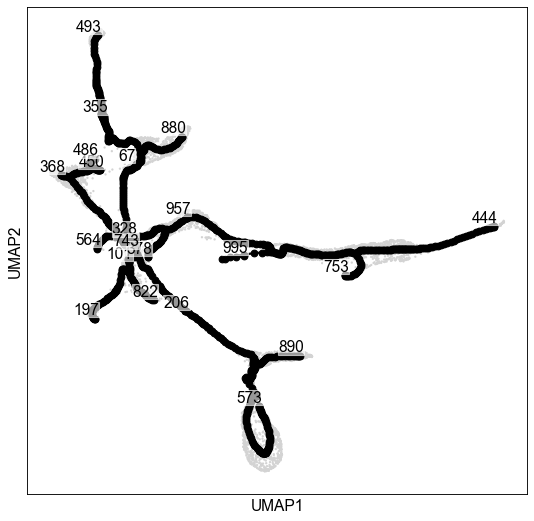

In [5]:
scf.pl.graph(adata,forks=False)

In [6]:
scf.tl.cleanup(adata,minbranchlength=9)

    graph cleaned --> removed 36 principal points


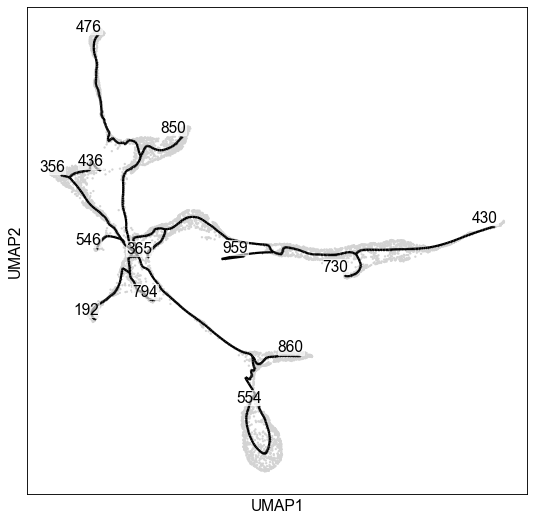

In [8]:
scf.pl.graph(adata,size_nodes=0.1,forks=False,tips=True)

In [9]:
scf.tl.cleanup(adata,minbranchlength=0,leaves=[365,959])

    graph cleaned --> removed 39 principal points


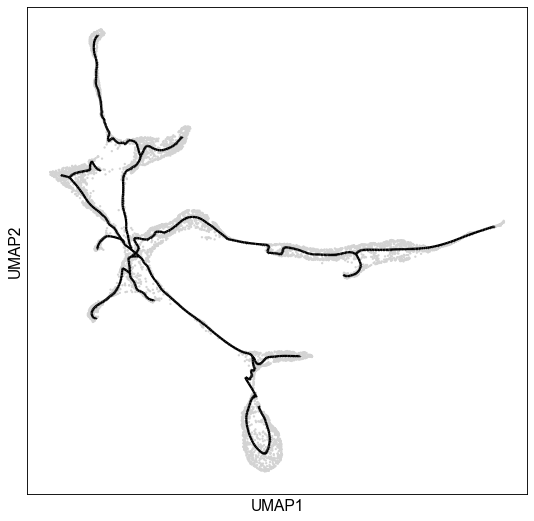

In [10]:
scf.pl.graph(adata,size_nodes=0.1,forks=False,tips=False)

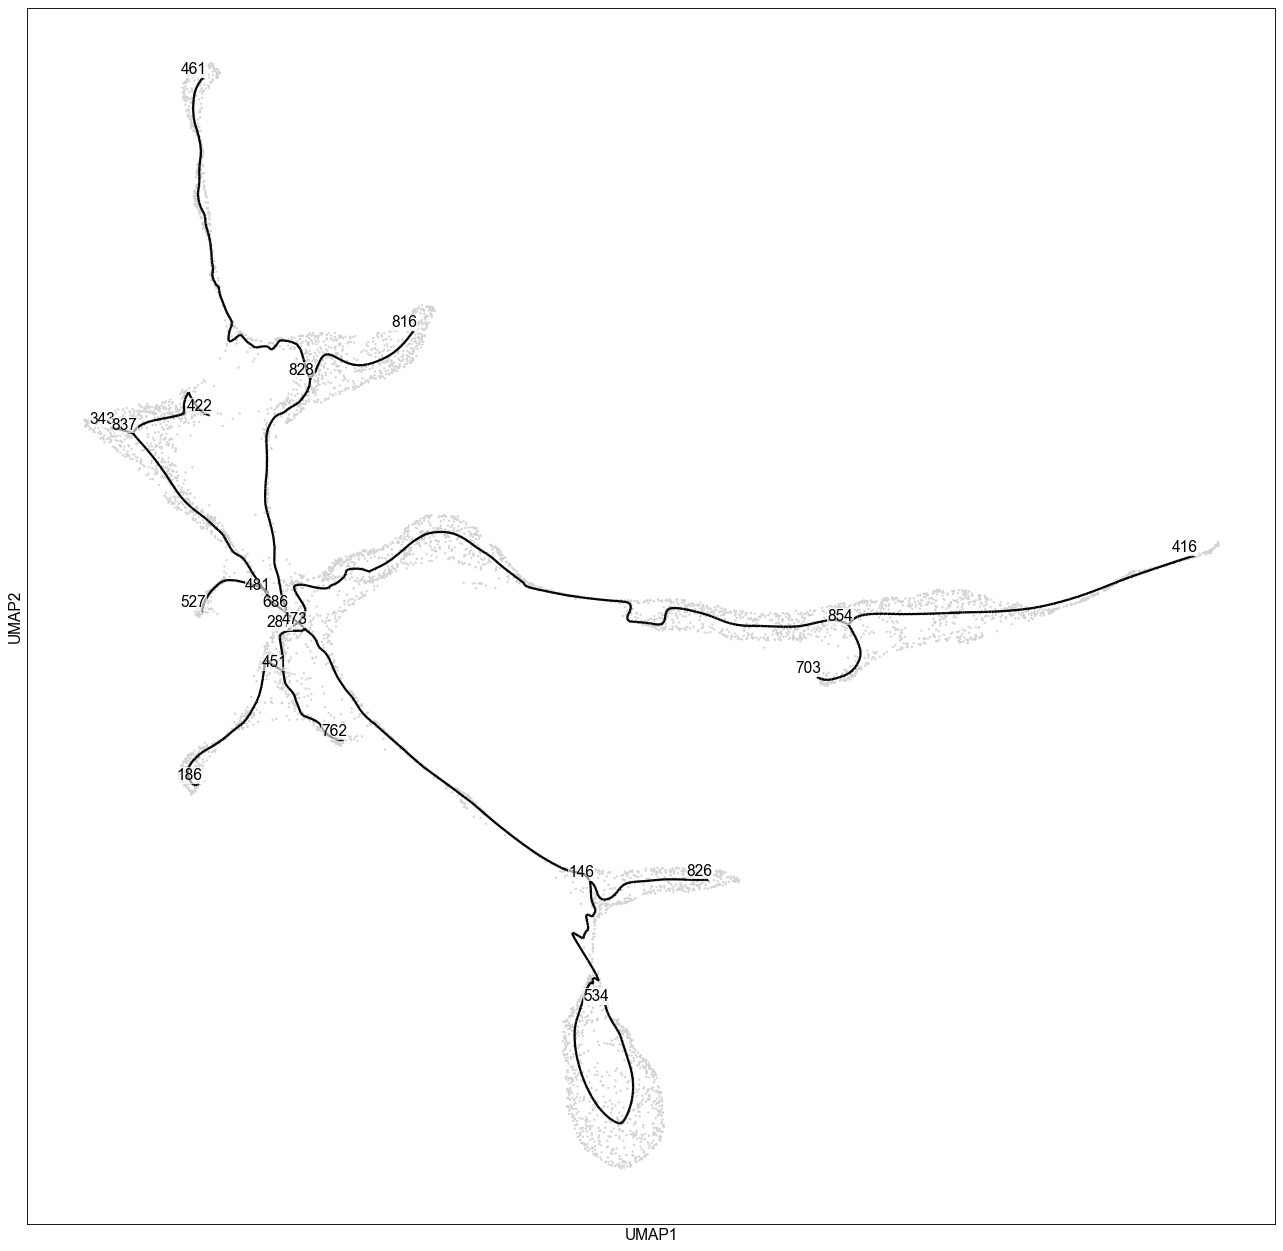

In [11]:
sc.set_figure_params(figsize=(20,20))
scf.pl.graph(adata,size_nodes=0.1)

In [12]:
scf.tl.roots(adata,roots=[343,816],meeting=686)

root selected --> added
    816 is the farthest root.
    .uns['graph']['root'] farthest root selected.
    .uns['graph']['root2'] 2nd root selected.
    .uns['graph']['meeting'] meeting point on the tree.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [13]:
scf.tl.pseudotime(adata,n_map=1,n_jobs=1)

projecting cells onto the principal graph
    finished (0:00:05) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


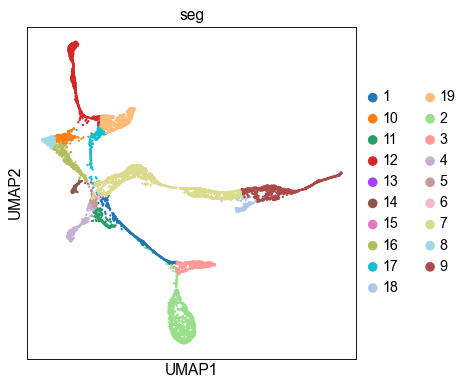

In [14]:
sc.set_figure_params(figsize=(5,5))
sc.pl.scatter(adata,basis="umap",color="seg")

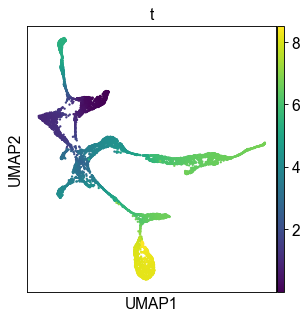

In [15]:
sc.set_figure_params(figsize=(4,4),dpi_save=600)
sc.pl.scatter(adata,basis="umap",color="t",color_map="viridis",save="pseudotime.png")

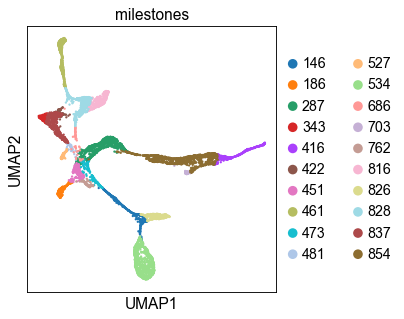

In [16]:
sc.pl.scatter(adata,basis="umap",color="milestones")

In [17]:
mil=["bi_ChC_Symp",
               "Gut_glia",
               "bi_Gut_SC",
               "ecaNCC",
               "unmySC",
               "psvNCC",
               "bi_Gut",
               "Sensory",
               "bi_Adre_Gut/SC",
               "Convergence 2",
               "Melanocytes",
               "Symp",
               "Convergence",
               "enFib",
               "Gut_neur",
               "eptNCC",
                "ChC",
               "lptNCC",
               "lcaNCC",
               "imSC"]
adata.obs.milestones=adata.obs.milestones.cat.rename_categories(mil)

In [18]:
adata

AnnData object with n_obs × n_vars = 6977 × 20074
    obs: 'devtime', 'plates', 'locations', 'leiden', 'S_score', 'G2M_score', 'phase', 'cell_cycle', 'NCC', 'Symp', 'ChC', 'Sensory', 'Gut_glia', 'Gut_neuron', 'Melanocyte', 'SC', 'enFib', 'assignments', 'Enteric_Adrenal', 'NCC_Glia', 'NCC_Glia_module', 'SCP_module', 'NCC_module', 't', 'seg', 'edge', 'milestones'
    uns: 'assignments_colors', 'devtime_colors', 'leiden_colors', 'locations_colors', 'phase_colors', 'graph', 'ppt', 'pseudotime_list', 'seg_colors', 'milestones_colors'
    obsm: 'X_diffusion', 'X_umap'

In [21]:
import numpy as np
newcolors={"ecaNCC":"#adfcff",
           "lcaNCC":"#26f5fc",
           "eptNCC":"#8cb1ff",
           "lptNCC":"#2b6fff",
           "psvNCC":"#c386fc",
           "Sensory":"#9e36ff",
          "Convergence":"#324f8a",
          "bi_Gut_SC":"#24e3a0",
          "imSC":"#aded5f",
          "unmySC":"#a39b26",
          "enFib":"#11a624",
          "Symp":"#ff820d",
          "ChC":"#ff3b3b",
          "bi_ChC_Symp":"#edbf05",
          "bi_Adre_Gut/SC":"#ffed00",
          "Gut_neur":"#a1004b",
          "Gut_glia":"#f500c4",
          "bi_Gut":"#f1aefc",
          "Melanocytes":"#006b5f",
          "Convergence 2":"#4fb2b8"}
           
adata.uns["milestones_colors"]=np.array(adata.uns["milestones_colors"])
for ctype in list(newcolors.keys()):
    adata.uns["milestones_colors"][adata.obs.milestones.cat.categories==ctype]=newcolors[ctype]
    
adata.uns["milestones_colors"]=adata.uns["milestones_colors"].tolist()

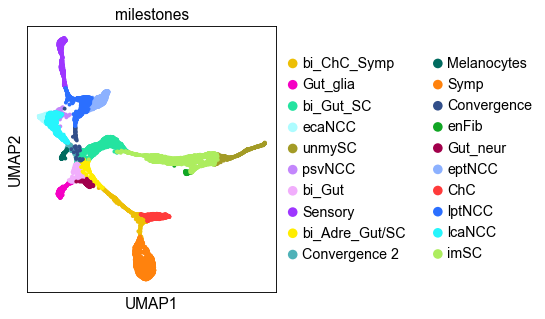

In [22]:
sc.pl.scatter(adata,basis="umap",color="milestones",size=50)

In [29]:
adata.obs.milestones=adata.obs.milestones.cat.rename_categories(pd.read_table('milestones_annot.txt',header=None)[1].values)

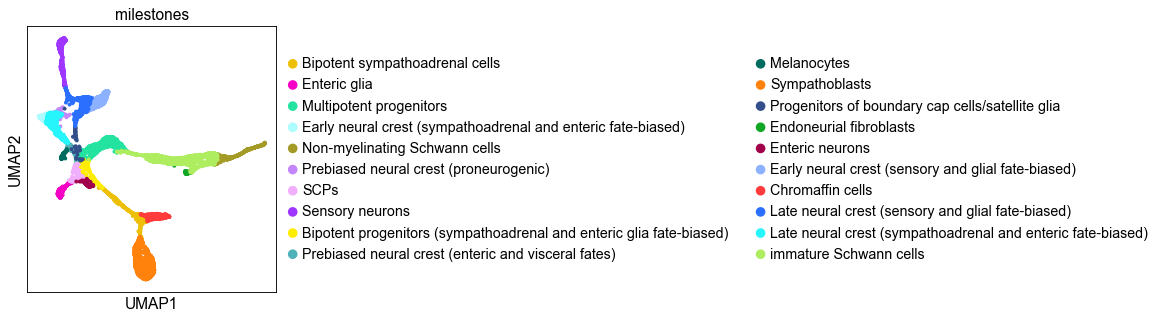

In [30]:
sc.pl.scatter(adata,basis="umap",color="milestones",size=50)

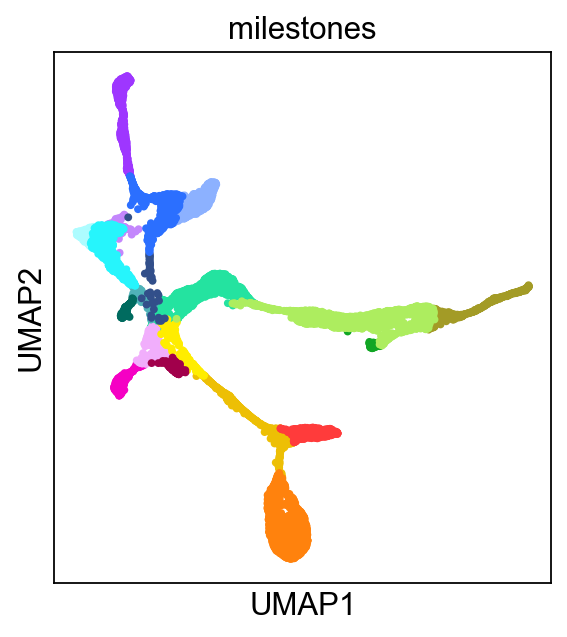

In [19]:
sc.pl.scatter(adata,basis="umap",color="milestones",size=50,legend_loc="none",save="milestones_nolegend.png")

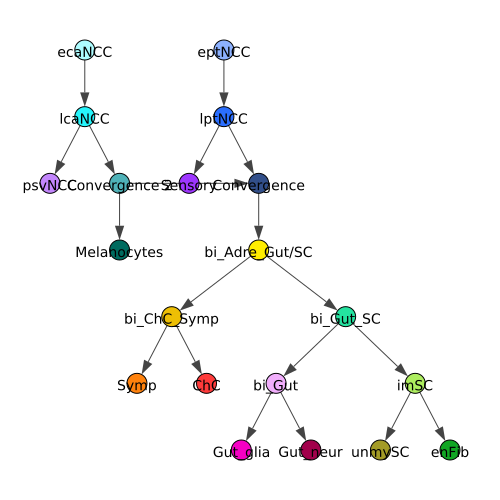

In [20]:
scf.pl.milestones(adata)

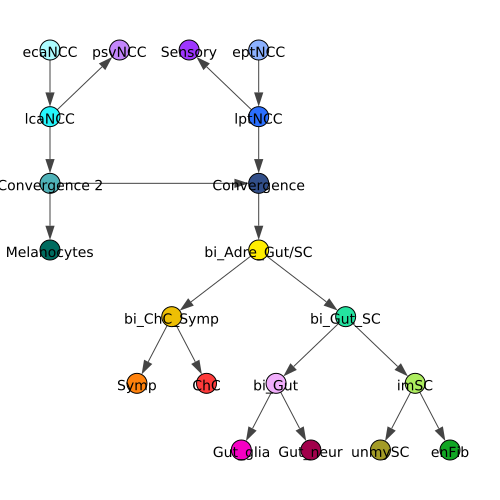

In [21]:
scf.pl.milestones(adata,roots=["ecaNCC","eptNCC","Sensory","psvNCC"])

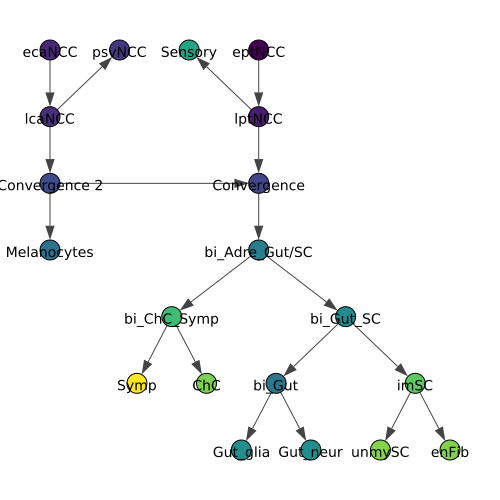

In [22]:
scf.pl.milestones(adata,roots=["ecaNCC","eptNCC","Sensory","psvNCC"],color="t")

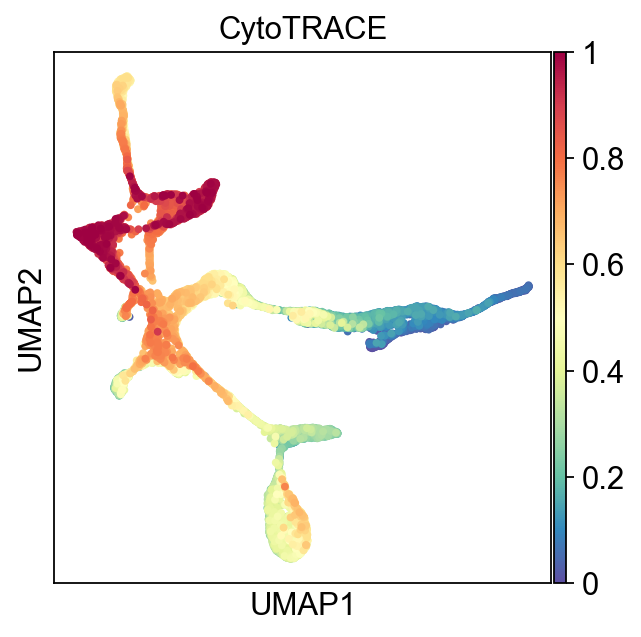

In [23]:
cytotrace=pd.read_table("megaCytoTRACE_plot_table.txt")["CytoTRACE"]
adata.obs["CytoTRACE"]=cytotrace
sc.pl.scatter(adata,basis="umap",color="CytoTRACE",size=50,color_map="Spectral_r",legend_loc="none")

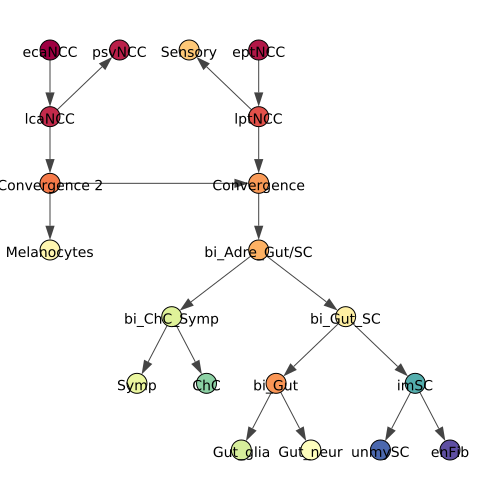

In [24]:
scf.pl.milestones(adata,roots=["ecaNCC","eptNCC","Sensory","psvNCC"],
                  color="CytoTRACE",cmap="Spectral_r")

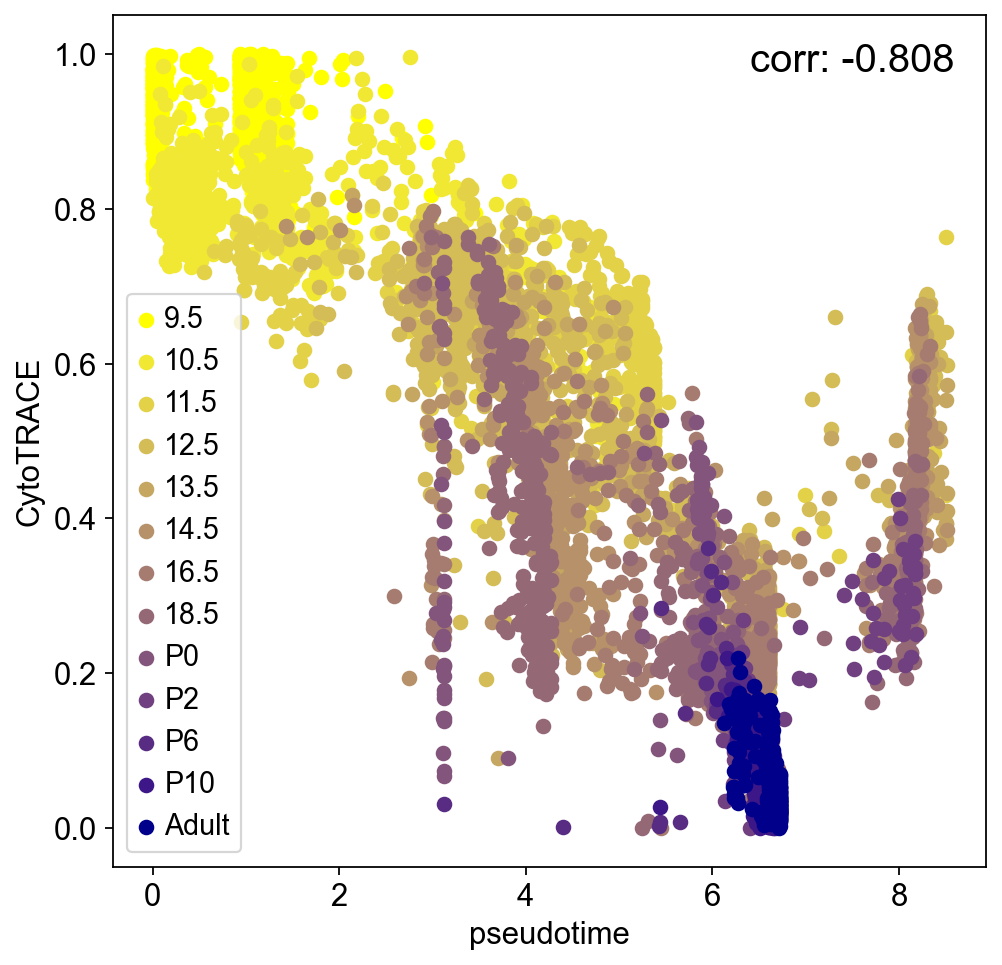

In [25]:
sc.set_figure_params(figsize=(7,7))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.margins(0.05) 
groups = adata.obs.groupby('devtime')
k=0
for name, group in groups:
    ax.scatter(group.t,group.CytoTRACE,label=name,
               color=adata.uns['devtime_colors'][k])
    k=k+1
ax.set_xlabel("pseudotime")
ax.set_ylabel("CytoTRACE")
ax.grid(False)
ax.legend(loc="lower left")
t = ax.text(7.5,.99,
            'corr: '+'{0:.3g}'.format(adata.obs[["t","CytoTRACE"]].corr().values[0,1]),
            ha="center", va="center", size=18
            )

In [26]:
adata.write_h5ad("adata_tree_fpm.h5ad")

In [27]:
obs=adata.obs.copy()
obsm=adata.obsm.copy()
uns=adata.uns.copy()
from anndata import AnnData
auc=pd.read_csv("scenic/output/auc_mtx_mm10.csv",index_col=0)
adata=AnnData(X=auc.values)
adata.obs_names=auc.index
adata.var_names=auc.columns
adata.obsm=obsm
adata.obs=obs
adata.uns=uns

In [28]:
fpm=pd.read_csv("fpm_mega.csv",index_col=0)
common=fpm.index[fpm.index.isin(np.array(list(map(lambda x: x.split("(")[0],adata.var_names))))]
fpm_tf=fpm.loc[common,adata.obs_names].values.T
adata=adata[:,common+"(+)"]
weights=fpm_tf.copy()
weights[weights>1]=1

In [29]:
adata.X=adata.X*weights
adata.layers["expression"]=fpm_tf

In [30]:
adata.write_h5ad("adata_tree_auc.h5ad")